In [1]:
from pandas import Series, DataFrame
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from patsy import dmatrices

In [3]:
import nltk
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('universal_tagset')
from nltk.probability import FreqDist
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\judge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\judge\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\judge\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\judge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stemmer = PorterStemmer()

In [6]:
train_rev = pd.read_csv('Train_rev1.csv')

In [7]:
rows = np.random.choice(train_rev.index.values, 2500)

In [8]:
train_rev1 = train_rev.loc[rows].copy()

In [9]:
Concat=pd.DataFrame([[train_rev1['FullDescription'].dropna().astype(str).str.cat(sep=', ') 
                         for c in train_rev1]], 
                       columns=train_rev1.columns)['FullDescription']

In [10]:
Fulldescription=Concat[0].lower()
pattern = '[{}]'.format(re.escape(string.punctuation))
Fulldescription1=re.sub(pattern, '', Fulldescription)


In [11]:
#Fulldescription1=re.sub('[0-9]', '', Fulldescription)

In [12]:
Fulldescription1=re.findall('[a-z]+', Fulldescription)
Fulldescription1=' '.join(Fulldescription1)

In [13]:
text=nltk.word_tokenize(Fulldescription1)
text1=nltk.pos_tag(text,tagset='universal')
freq=nltk.FreqDist(tag for (word, tag) in text1)
freq
sorted(freq.items(), key=lambda x:x[1],reverse=True)

[(u'NOUN', 215070),
 (u'VERB', 109244),
 (u'ADJ', 74108),
 (u'ADP', 66103),
 (u'DET', 53233),
 (u'CONJ', 31006),
 (u'PRON', 22216),
 (u'PRT', 21220),
 (u'ADV', 16733),
 (u'NUM', 1117),
 (u'X', 421),
 (u'.', 2)]

In [14]:
text=nltk.word_tokenize(Fulldescription1)
text1=nltk.pos_tag(text)
freq=nltk.FreqDist(tag for (word, tag) in text1)
freq
sorted(freq.items(), key=lambda x:x[1],reverse=True)

[('NN', 163509),
 ('JJ', 72007),
 ('IN', 66103),
 ('DT', 51432),
 ('NNS', 51296),
 ('VB', 32999),
 ('CC', 31006),
 ('VBG', 23028),
 ('TO', 20301),
 ('VBP', 16061),
 ('RB', 15241),
 ('PRP', 12922),
 ('VBN', 12364),
 ('VBZ', 10925),
 ('MD', 10482),
 ('PRP$', 7777),
 ('VBD', 3385),
 ('WP', 1497),
 ('WDT', 1376),
 ('JJS', 1204),
 ('CD', 1117),
 ('WRB', 933),
 ('RP', 913),
 ('JJR', 897),
 ('FW', 413),
 ('RBR', 304),
 ('EX', 266),
 ('NNP', 264),
 ('RBS', 255),
 ('PDT', 159),
 ('WP$', 20),
 ('UH', 7),
 ('POS', 6),
 ('$', 2),
 ('NNPS', 1),
 ('SYM', 1)]

In [15]:
#Exlcuding stopwords
stop_words=set(stopwords.words('english'))

In [16]:
Fulldescription1_fil=[w for w in text if not w in stop_words]

In [17]:
Fulldescription2=" ".join(Fulldescription1_fil)
text2=nltk.word_tokenize(Fulldescription2)
text2=nltk.pos_tag(text2,tagset='universal')
freq2=nltk.FreqDist(tag for (word, tag) in text2)
sorted(freq2.items(), key=lambda x:x[1],reverse=True)

[(u'NOUN', 208043),
 (u'ADJ', 76374),
 (u'VERB', 73374),
 (u'ADV', 13796),
 (u'ADP', 6343),
 (u'NUM', 1166),
 (u'PRON', 711),
 (u'X', 564),
 (u'CONJ', 431),
 (u'DET', 364),
 (u'PRT', 96)]

#A2 wRITE ABOUT WHETHER IT AGREES WITH ZIPFS LAW 

In [18]:
A2=nltk.FreqDist(text1)
A2

FreqDist({('and', 'CC'): 26761, ('the', 'DT'): 21353, ('to', 'TO'): 20301, ('a', 'DT'): 15730, ('of', 'IN'): 14676, ('in', 'IN'): 10443, ('for', 'IN'): 8941, ('with', 'IN'): 7218, ('you', 'PRP'): 7082, ('will', 'MD'): 6693, ...})

In [19]:
pylab.rcParams['figure.figsize'] = (20, 8)


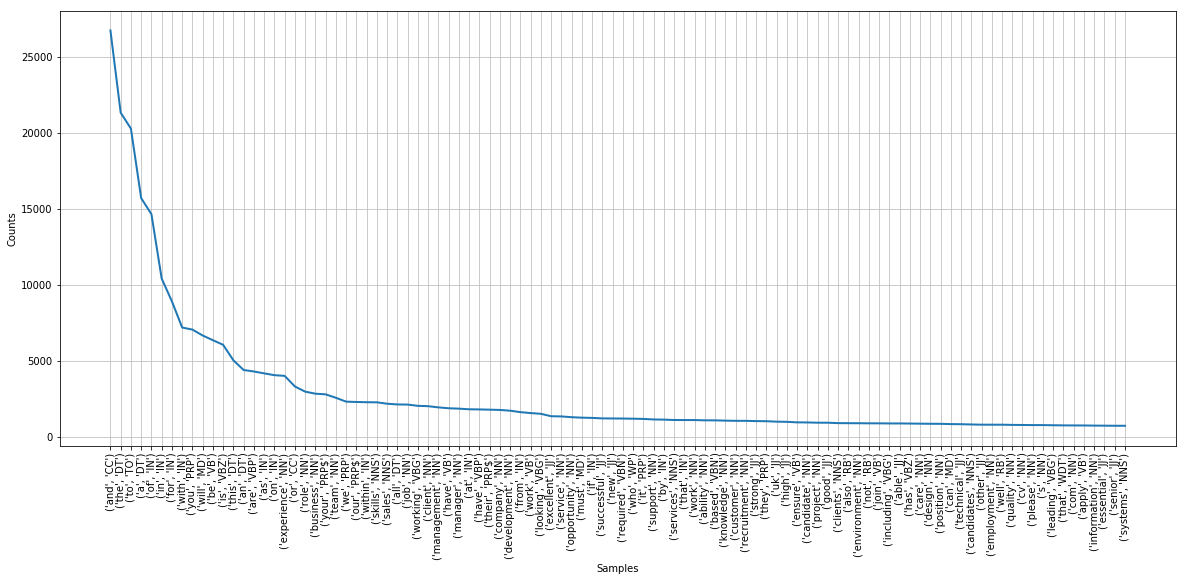

In [20]:
A2.plot(100)

Satisifes Zipf's law: 
(1)few words occur very frequently
(2)medium number of words have medium frequency
(3)Many words occur very infrequently

In [21]:
Freq=pd.DataFrame(nltk.word_tokenize(Fulldescription1),columns=['Word'])

In [22]:
Freq1=pd.DataFrame(Freq['Word'].value_counts())

In [23]:
Freq1['Rank']=Freq1['Word'].rank(ascending=False)

In [24]:
Freq1['Wordcount_ln']=log(Freq1['Word'])
Freq1['Rank_ln']=log(Freq1['Rank'])

Text(0,0.5,'log(Rank)')

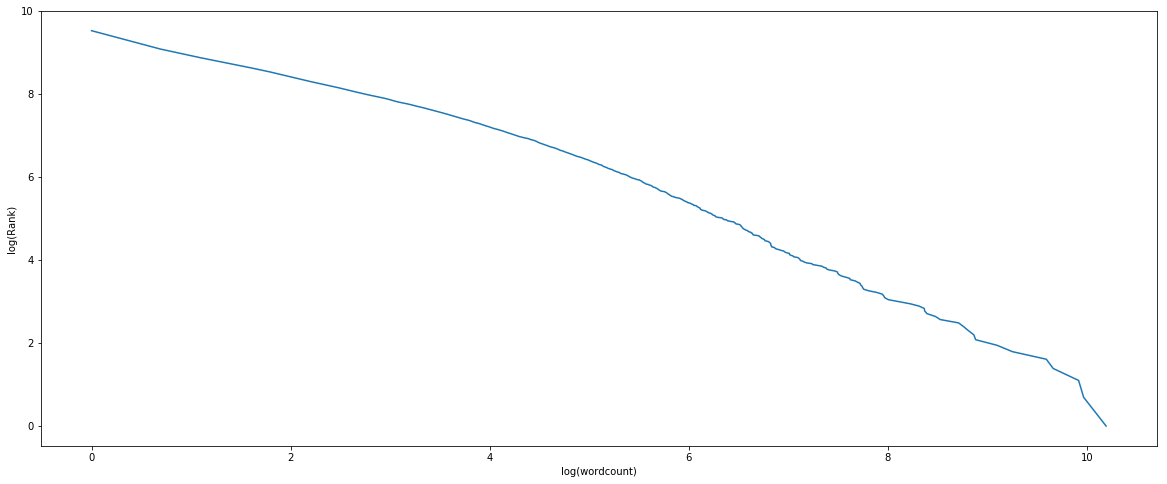

In [25]:
plt.plot(Freq1['Wordcount_ln'],Freq1['Rank_ln'])
xlabel("log(wordcount)")
ylabel("log(Rank)")


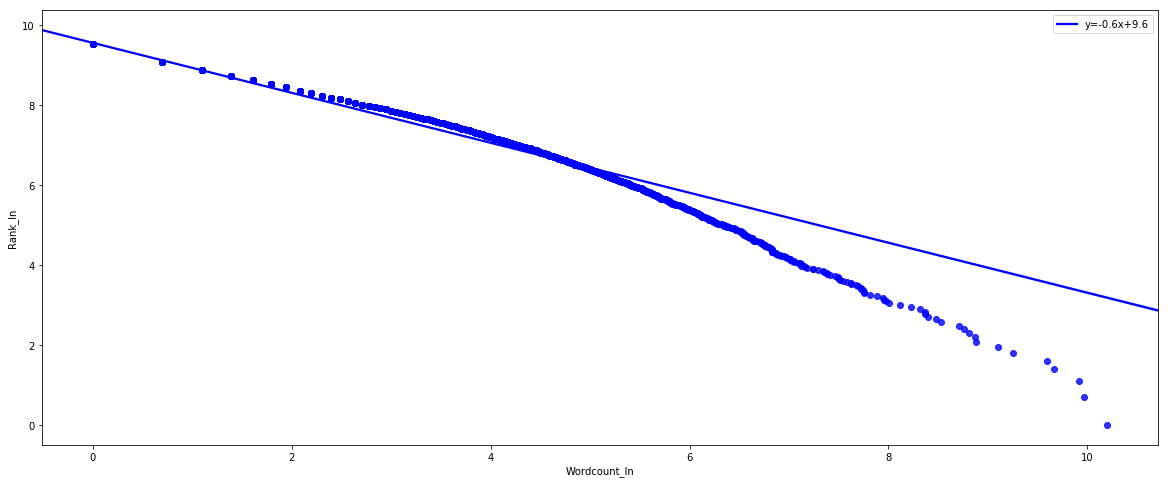

In [26]:
import seaborn as sns
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(Freq1['Wordcount_ln'],Freq1['Rank_ln'])
ax=sns.regplot(x='Wordcount_ln', y='Rank_ln', data=Freq1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()


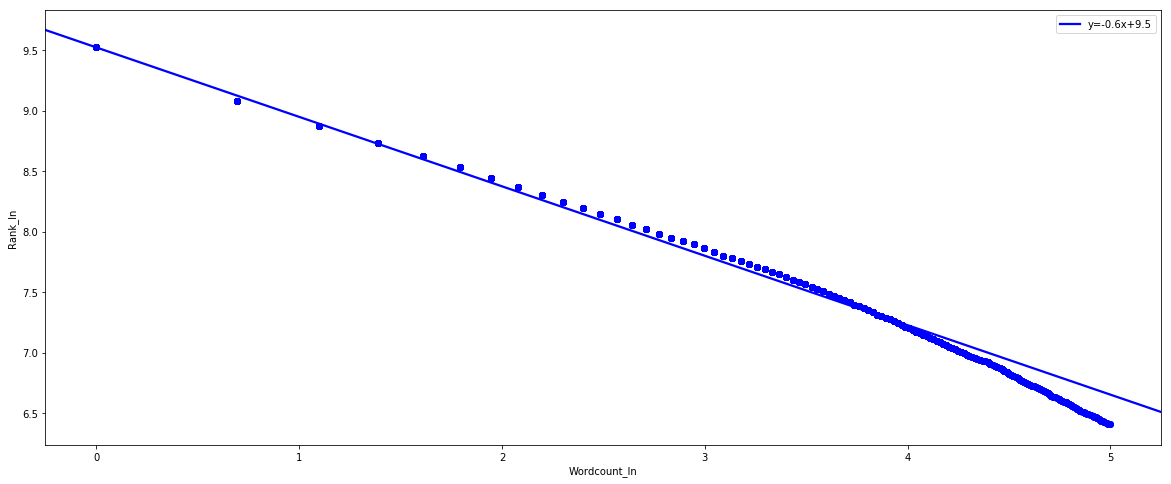

In [27]:
Freq_filter=Freq1[Freq1['Wordcount_ln']<=5]

slope, intercept, r_value, p_value, std_err = stats.linregress(Freq_filter['Wordcount_ln'],Freq_filter['Rank_ln'])
ax=sns.regplot(x='Wordcount_ln', y='Rank_ln', data=Freq_filter,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

Zipfs law: 
rank*wordcount=constant ; log(rank)+log(wordcount)=constant 
ideally slope should be equal to -1 but it is -0.6 in this case??? Doubt????
product of the frequency of words and their rank is approximately constant upto a certain rank according to the above graph which again proves that the data follows Zipf's law

#A3

In [28]:
text_A3=nltk.word_tokenize(Fulldescription2)
#prefixes=("\xe2")
#newlist =[x for x in text_A3 if not x.startswith(prefixes)]
#prefixes
#[stemmer.stem(i) for i in text_A3]

In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text_A3=[lemmatizer.lemmatize(i) for i in text_A3]

In [30]:
text_A3

['legal',
 'team',
 'experienced',
 'significant',
 'growth',
 'past',
 'year',
 'result',
 'client',
 'currently',
 'exciting',
 'opportunity',
 'consultant',
 'join',
 'wellestablished',
 'successful',
 'leeds',
 'team',
 'responsible',
 'maintaining',
 'improving',
 'existing',
 'client',
 'service',
 u'relationship',
 'well',
 'growing',
 'existing',
 'client',
 'base',
 'increase',
 'market',
 'share',
 'within',
 'sector',
 'working',
 'strong',
 'client',
 'portfolio',
 'benefit',
 'large',
 'client',
 'base',
 'welldeveloped',
 u'relationship',
 'extremely',
 'knowledgeable',
 'team',
 'people',
 'successful',
 'legal',
 'team',
 'energetic',
 u'result',
 'driven',
 'determined',
 'ultimately',
 'people',
 'focused',
 u'posse',
 'excellent',
 'communication',
 u'skill',
 'business',
 'awareness',
 'resilience',
 'determination',
 'passion',
 'required',
 'build',
 'long',
 'fruitful',
 'career',
 'legal',
 'recruitment',
 'also',
 'good',
 'understanding',
 'importance',
 'buil

In [31]:
words = pd.Series(text_A3)
words.value_counts(ascending=False)[:10]

experience    4341
role          3189
work          3019
team          2990
client        2973
business      2966
skill         2531
service       2527
job           2467
within        2304
dtype: int64

Part B B1)

In [32]:
train_rev1['ContractType']=train_rev1['ContractType'].fillna("Unknown")
train_rev1['Title']=train_rev1['Title'].fillna("Unknown")
train_rev1['ContractTime']=train_rev1['ContractTime'].fillna("Unknown")
TopCities=['London',
'Oxford',
'Brighton and Hove',
'Cambridge',
'Bristol',
'Portsmouth',
'Reading, Berkshire',
'Edinburgh',
'Leicester',
'York']
pattern = '|'.join(TopCities)
#frame.a.str.contains(pattern)
train_rev1['High_CL']=train_rev1['LocationRaw'].str.contains(pattern)
train_rev1['High_CL']=(train_rev1['High_CL']==True).astype(int)
train_rev1['H/L']=train_rev1.SalaryNormalized.rank(pct=True)
train_rev1['y']=np.where(train_rev1['H/L'] >= 0.75, 1, 0)

In [33]:
data=train_rev1[['ContractType','ContractTime','H/L','Category','y']]

In [34]:
data['y'].value_counts()

0    1874
1     626
Name: y, dtype: int64

In [35]:
print data.columns.values

['ContractType' 'ContractTime' 'H/L' 'Category' 'y']


In [36]:
categorical_columns = ['ContractType','ContractTime','Category']
df_dummies = pd.get_dummies(data[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = df_dummies.columns.values
dummy_column_names[:10]

array(['ContractType_Unknown', 'ContractType_full_time',
       'ContractType_part_time', 'ContractTime_Unknown',
       'ContractTime_contract', 'ContractTime_permanent',
       'Category_Accounting & Finance Jobs', 'Category_Admin Jobs',
       'Category_Charity & Voluntary Jobs', 'Category_Consultancy Jobs'],
      dtype=object)

In [37]:
df2 = pd.concat([data, df_dummies], axis=1)

In [38]:
formula = 'y ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))
print formula

y ~ 0 + Q("ContractType_Unknown") + Q("ContractType_full_time") + Q("ContractType_part_time") + Q("ContractTime_Unknown") + Q("ContractTime_contract") + Q("ContractTime_permanent") + Q("Category_Accounting & Finance Jobs") + Q("Category_Admin Jobs") + Q("Category_Charity & Voluntary Jobs") + Q("Category_Consultancy Jobs") + Q("Category_Creative & Design Jobs") + Q("Category_Customer Services Jobs") + Q("Category_Domestic help & Cleaning Jobs") + Q("Category_Energy, Oil & Gas Jobs") + Q("Category_Engineering Jobs") + Q("Category_Graduate Jobs") + Q("Category_HR & Recruitment Jobs") + Q("Category_Healthcare & Nursing Jobs") + Q("Category_Hospitality & Catering Jobs") + Q("Category_IT Jobs") + Q("Category_Legal Jobs") + Q("Category_Logistics & Warehouse Jobs") + Q("Category_Maintenance Jobs") + Q("Category_Manufacturing Jobs") + Q("Category_Other/General Jobs") + Q("Category_PR, Advertising & Marketing Jobs") + Q("Category_Property Jobs") + Q("Category_Retail Jobs") + Q("Category_Sales Jo

In [39]:
#df2_train=
#rows1 = np.random.choice(df2.index.values, int(0.7*len(df2)))
df2_train = df2.sample(n=int(round(0.7*len(df2),0)))
#df2_train=df2.loc[rows1]
len(df2_train)


1750

In [40]:
df2_test=df2[~df2.index.isin(df2_train.index)].dropna()
len(df2_test)

742

In [41]:
Y, X = dmatrices(formula, df2, return_type='dataframe')
y = Y['y'].values

In [42]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X, y)
from sklearn import metrics
prediction = model.predict(X)
print "Accuracy_dataset",metrics.accuracy_score(y, prediction)

Accuracy_dataset 0.7528


In [43]:
Y_train, X_train = dmatrices(formula, df2_train, return_type='dataframe')
y_train = Y_train['y'].values
model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
print "Train_set Accuracy",metrics.accuracy_score(y_train, prediction_train)

Train_set Accuracy 0.756


In [44]:
Y_test, X_test = dmatrices(formula, df2_test, return_type='dataframe')
y_test = Y_test['y'].values
model.fit(X_test, y_test)
prediction_test = model.predict(X_test)
print "Test_set Accuracy",metrics.accuracy_score(y_test, prediction_test)

Test_set Accuracy 0.7452830188679245


In [45]:
#test_rev1 = pd.read_csv('Test_rev1.csv')
#test_rev1['ContractType']=test_rev1['ContractType'].fillna("Unknown")
#test_rev1['Title']=test_rev1['Title'].fillna("Unknown")
#test_rev1['ContractTime']=test_rev1['ContractTime'].fillna("Unknown")
#test_rev1['High_CL']=test_rev1['LocationRaw'].str.contains(pattern)
#test_rev1['High_CL']=(test_rev1['High_CL']==True).astype(int)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from operator import itemgetter
from sklearn.metrics import classification_report
import csv
import os

In [47]:
pattern = '[{}]'.format(re.escape(string.punctuation))
pattern

'[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^\\_\\`\\{\\|\\}\\~]'

In [48]:
train_rev1['FullDescription1']=train_rev1['FullDescription'].dropna().str.lower()
train_rev1['FullDescription1']=train_rev1['FullDescription1'].str.replace('\d+', '')

In [49]:
train_rev1['FullDescription1']=train_rev1['FullDescription'].dropna().str.lower().str.replace('\d+', '').apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))

In [50]:
train_rev1['FullDescription1']

160628    the legal team has experienced significant gro...
152151    this flourishing boutique westend firm with a ...
50758     job title business development managersector e...
172288    job title  night porter category  receptionfro...
241827    job title mechanical detailed design engineer ...
179896    my client near northampton is looking to recru...
235122    my client part of a large corporate lettings g...
208474    our client is looking for inspectors on a temp...
135193    are you a highly skilled enthusiastic individu...
123579    an exciting opportunity has arisen for fork li...
188032    ruby on rails developer  nginx  unicorn postgr...
175283    a world leading company with  years in their f...
64697      assist the financial controller commercial di...
68047     a leading fashion brand with a great opportuni...
182789    hcl nursing are recruiting for health care ass...
20640     our client is a very forward thinking developi...
115348    modus care provides specialist

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
train_rev1['FullDescription1']= train_rev1['FullDescription1'].apply(lemmatize_text)

#Doubts : should we consider trigrams as well? 
what are the limits for the parameters in tfidf
Zipf's laws: should we consider how it changes for each and every variants or just wrt ln x works?
should we split the ranks and run regression ?
we hv got slope as -0.6 is that ok ?
should we use stemmed version before calculating tf-idf?


In [52]:
features.shape
#5952 features for 2500 job descriptions

(2500L, 5922L)

In [55]:
for i in range(0,2):
    features_chi2 = chi2(features,labels==i)
    
    indices = np.argsort(features_chi2[i])
    print indices
    feature_names = np.array(tfidf.get_feature_names())[indices]
    feature_names
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("Category:",i)
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

[4710  578 4924 ... 1118  336  339]
('Category:', 0)
  . Most correlated unigrams:
. lead
. senior
. stakeholders
. teams
. financial
. projects
. risk
. consulting
. architect
. architecture
  . Most correlated bigrams:
. qualified accountant
. monday friday
. leading financial
. subject matter
. demonstrable experience
. responsible leading
. services organisation
. customer service
. financial services
. based london
[ 339  336 1118 ... 4924  578 4710]
('Category:', 1)
  . Most correlated unigrams:
. sounds
. offers
. healthcare
. aimed
. holding
. makers
. levels
. plus
. performed
. brand
  . Most correlated bigrams:
. required join
. skills attributes
. active directory
. exciting opportunities
. team experience
. team based
. essential ideally
. key attributes
. skill set
. sales managers


In [56]:
labels =train_rev1['y']
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, train_rev1.index, test_size=0.33, random_state=0)


In [57]:
clf=MultinomialNB().fit(X_train, y_train)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
features
labels=train_rev1.y
labels

from operator import itemgetter
pd.DataFrame(clf.coef_)
#What are the top N most predictive features per class?
N = 10
vocabulary = np.array([t for t, i in sorted(tfidf.vocabulary_.iteritems(), key=itemgetter(1))])
topN = np.argsort(clf.coef_[0])[-N:]
print "\nThe top %d most informative features for category %s: \n%s" % (N, unique(labels), " ".join(vocabulary[topN]))
 #print topN

In [58]:
y_pred = clf.predict(X_test)

In [59]:
len(X_train),len(X_test)

(1675, 825)

In [60]:
y_test.value_counts()

0    611
1    214
Name: y, dtype: int64

In [61]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[601,  10],
       [197,  17]], dtype=int64)

In [62]:
Text_Accuracy=mean(y_test==y_pred)
print "Text_Accuracy: ",Text_Accuracy

Text_Accuracy:  0.7490909090909091


In [63]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(MultinomialNB(), features,train_rev1['y'] , scoring='accuracy', cv=5)
accuracies.mean()

0.7768028352113407